
## Plasticc Challange

In [51]:
#Import pandas for manipulating dataframes
import pandas as pd

#Import matplot for visualization figures
import matplotlib.pyplot as plt

# Import figure from bokeh.plotting
from bokeh.plotting import figure

# Import output_file and show from bokeh.io
from bokeh.io import  output_notebook, show
output_notebook()

Loading BokehJS ...

### Load datasets

In [9]:
df_sample = pd.read_csv('data/sample_submission.csv')
df_metadata = pd.read_csv('data/training_set_metadata.csv')
df_train = pd.read_csv('data/training_set.csv')
df_test_sample = pd.read_csv('data/test_set_sample.csv')

In [12]:
df_sample.head(3)
df_metadata.head(3)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42



## Metadata

Attributes: 
- object_id
- ra
- decl
- gal_l
- gal_b
- ddf
- hostgal_specz
- hostgal_photoz
- hostgal_photoz_err
- distmod
- mwebv
- target

In [23]:
print("Cantidad de objetos registrados "+ str(df_metadata.shape))

Cantidad de objetos registrados (7848, 12)


In [24]:
df_metadata.head(5)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [25]:
num_clases = df_metadata['target'].unique()
print("Número de clases: "+ str(len(num_clases)))

Número de clases: 14


## Conjunto de entranamiento

In [26]:
df_train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [27]:
df_train.shape

(1421705, 6)

### Object 615

In [28]:
obj_615 = df_train[df_train['object_id'] == 615]
obj_615.shape

(352, 6)

In [29]:
obj_615['passband'].unique()


array([2, 1, 3, 4, 5, 0])

In [30]:
pass_1 = obj_615[obj_615['passband'] == 1]
pass_1.shape

(58, 6)

In [31]:
obj_615['mjd'].min

<bound method Series.min of 0      59750.4229
1      59750.4306
2      59750.4383
3      59750.4450
4      59752.4070
5      59752.4147
6      59752.4224
7      59752.4334
8      59752.4435
9      59767.2968
10     59767.3045
11     59767.3122
12     59767.3233
13     59767.3343
14     59770.2179
15     59770.2256
16     59770.2334
17     59770.2445
18     59770.2557
19     59779.3188
20     59779.3265
21     59779.3342
22     59779.3452
23     59779.3562
24     59782.1897
25     59782.1974
26     59782.2051
27     59782.2162
28     59782.2274
29     59797.2861
          ...    
322    60603.0286
323    60603.0363
324    60603.0473
325    60603.0584
326    60606.0225
327    60606.0303
328    60606.0379
329    60606.0490
330    60606.0601
331    60609.0247
332    60609.0323
333    60609.0400
334    60609.0510
335    60609.0621
336    60612.0266
337    60613.0269
338    60614.0276
339    60615.0375
340    60616.0290
341    60617.0295
342    60621.1734
343    60621.1810
344    60621.1886


In [32]:
pass_1 = obj_615[obj_615['passband'] == 1]
x = pass_1['mjd']
y = pass_1['flux']

In [58]:
# create a new plot with a title and axis labels
p = figure(title="Passband", x_axis_label='Time', y_axis_label='Flux')

# add a line renderer with legend and line thickness
p.square(x, y, legend="Flux", fill_color=None, line_color="#798800")
p.line(x, y, legend="Flux",line_width=1, line_color="green")
# show the results
show(p)

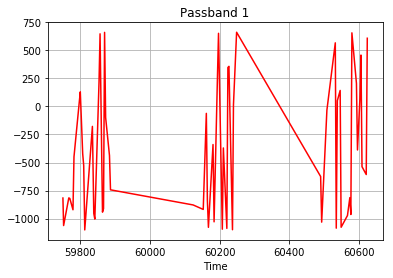

In [31]:


plt.xlabel('Time')
plt.plot(x,y, 'r')
plt.title('Passband '+ str(1))
plt.grid(True)

In [16]:
time_min = (59750.4229-40587)*86400
print(time_min, "Monday, 20 June 2022 10:08:58.559")

time_max = (60624.2132 - 40587)*86400
print(time_max, " Sunday, 10 November 2024 5:07:00.479")

time_med = (59750.4306 - 40587)*86400
print(time_med, "Monday, 20 June 2022 10:20:03.840")

1655719738.5599997 Monday, 20 June 2022 10:08:58.559
1731215220.4799998  Sunday, 10 November 2024 5:07:00.479
1655720403.84 Monday, 20 June 2022 10:20:03.840


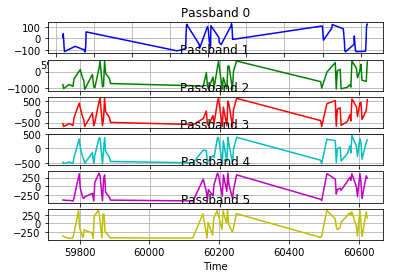

In [17]:
passband = [0,1,2,3,4,5]
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for band in passband:
    pass_1 = obj_615[obj_615['passband'] == band]
    x = pass_1['mjd']
    y = pass_1['flux']
    plt.subplot(6,1,band+1)
    plt.xlabel('Time')
    plt.plot(x,y, color[band])
    plt.title('Passband '+ str(band))
    plt.grid(True)
#plt.subplots_adjust(hspace=1.0, wspace=2, bottom=0.17, left=0.075, top=0.18)
    


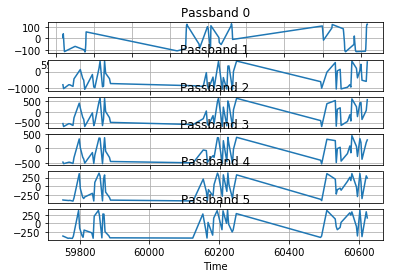

In [18]:
passband = [0,1,2,3,4,5]

for band in passband:
    pass_1 = obj_615[obj_615['passband'] == band]
    x = pass_1['mjd']
    y = pass_1['flux']
    plt.subplot(6,1,band+1)
    plt.xlabel('Time')
    plt.plot(x,y)
    plt.title('Passband '+ str(band))
    plt.grid(True)
#plt.subplots_adjust(hspace=1.0, wspace=2, bottom=0.17, left=0.075, top=0.18)


### Object 713

In [19]:
pass_2 = obj_615[obj_615['passband'] == 2]

obj_713 = df_train[df_train['object_id'] == 713]
obj_713.shape


(350, 6)

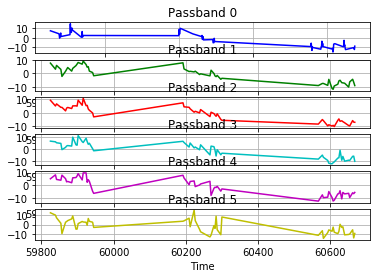

In [20]:
passband = [0,1,2,3,4,5]
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for band in passband:
    pass_1 = obj_713[obj_713['passband'] == band]
    x = pass_1['mjd']
    y = pass_1['flux']
    plt.subplot(6,1,band+1)
    plt.xlabel('Time')
    plt.plot(x,y,color[band])
    plt.title('Passband '+ str(band))
    plt.grid(True)

##  Test dataset

In [21]:

df_test_sample.shape

(1000000, 6)

In [22]:
df_test_sample.head()

,object_id,mjd,passband,flux,flux_err,detected
0,13,59798.3205,2,-1.299735,1.357315,0
1,13,59798.3281,1,-2.095392,1.148654,0
2,13,59798.3357,3,-0.923794,1.763655,0
3,13,59798.3466,4,-4.009815,2.602911,0
4,13,59798.3576,5,-3.403503,5.367328,0
